## Семинар 13: "Обучение с подкреплением 1"

ФИО: Висков Василий

###  FrozenLake


<img src="http://vignette2.wikia.nocookie.net/riseoftheguardians/images/4/4c/Jack's_little_sister_on_the_ice.jpg/revision/latest?cb=20141218030206" alt="a random image to attract attention" style="width: 400px;"/>



In [1]:
import gym
import numpy as np 

#create a single game instance
env = gym.make("FrozenLake8x8-v0")

#start new game
env.reset();

In [2]:
# display the game state
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


### legend

![img](https://cdn-images-1.medium.com/max/800/1*MCjDzR-wfMMkS0rPqXSmKw.png)

### Gym interface

The three main methods of an environment are
* __reset()__ - reset environment to initial state, _return first observation_
* __render()__ - show current environment state (a more colorful version :) )
* __step(a)__ - commit action __a__ and return (new observation, reward, is done, info)
 * _new observation_ - an observation right after commiting the action __a__
 * _reward_ - a number representing your reward for commiting action __a__
 * _is done_ - True if the MDP has just finished, False if still in progress
 * _info_ - some auxilary stuff about what just happened. Ignore it for now

In [3]:
print("initial observation code:", env.reset())
print('printing observation:')
env.render()
print("observations:", env.observation_space, 'n=', env.observation_space.n)
print("actions:", env.action_space, 'n=', env.action_space.n)

initial observation code: 0
printing observation:

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
observations: Discrete(64) n= 64
actions: Discrete(4) n= 4


In [4]:
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)
print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)
print("printing new state:")
env.render()

taking action 2 (right)
new observation code: 1
reward: 0.0
is game over?: False
printing new state:
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [5]:
action_to_i = {
    'left':0,
    'down':1,
    'right':2,
    'up':3
}

### Попробуйте походить по замерзшему озеру, не упав в дырку. 
* Каждый шаг вы с вероятностью __0.5__ будете двигаться в выбранном направлении и с вероятностью __0.5__ в случайном.
* Если упадете, используйте __env.reset()__ чтобы перезапустить __env__

In [6]:
env.reset()

0

In [7]:
l, d, r, u = 0, 1, 2, 3
id_to_letter = ['l', 'd', 'r', 'u']
env.step(r)
env.render()

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [8]:
env.step(action_to_i['down'])
env.render()

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


## Задание: 
Следуя шаблонам функций реализуйте алгоритм Policy iteration.
Протестируйте его с помощью функции __evaluate_policy__.
Попробуйте разные значение для gamma и сравните результаты.

In [9]:
env.env

In [10]:
def run_episode(env, policy, gamma = 1.0, render = False):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

In [11]:
def evaluate_policy(env, policy, gamma = 1.0,  n = 100):
    scores = [
            run_episode(env, policy, gamma = gamma, render = False)
            for _ in range(n)]
    return np.mean(scores)

In [12]:
# Используя фиксированную value_function и жадную стратегию получите policy

def extract_policy(v, gamma = 1.0):
    policy = np.zeros(env.env.nS, dtype=np.int)
    for s in range(policy.shape[0]):
        q_sa = np.zeros(env.action_space.n)
        for a in range(q_sa.shape[0]):
            for p, s_, r, _ in env.env.P[s][a]:
                q_sa[a] += p * (r + gamma * v[s_])
            policy[s] = np.argmax(q_sa)
    return policy

In [13]:
# Используя фиксированную policy с помощью сэмплирования получите оценку для value_function с точностью 1e-10


def compute_policy_v(env, policy, gamma=1.0):
    prev_v = np.ones(env.env.nS)
    new_v = np.zeros(env.env.nS)
    while np.linalg.norm(prev_v - new_v) > 1e-10:
        prev_v = np.copy(new_v)
        for s in range(env.env.nS):
            new_v[s] = 0
            for p, s_, r, _ in env.env.P[s][policy[s]]:
                new_v[s] += p * (r + gamma * prev_v[s_])
    return new_v

In [14]:
def policy_iteration(env, gamma = 1.0):
    policy = np.random.choice(env.env.nA, env.env.nS)
    max_iterations = 20
    gamma = 1.0
    i = 0
    for i in range(max_iterations):
        old_policy_v = compute_policy_v(env, policy)
        new_policy = extract_policy(old_policy_v)
        if np.all(policy == new_policy):
            break

        policy = new_policy
    return policy

In [15]:
action_to_i_rev = {
    0:'l',
    1:'d',
    2:'r',
    3:'u'
}

In [16]:
gammas = np.append(np.append(np.linspace(0, 0.9, 10), np.linspace(0.9, 0.99, 10)), np.linspace(0.99, 1, 10))
scores = np.zeros(gammas.shape[0])

In [17]:
for idx, gamma in enumerate(gammas):
    print(idx, end=' ', flush=True)
    env = gym.make("FrozenLake8x8-v0")
    optimal_policy = policy_iteration(env, gamma=gamma)
    policy_score = evaluate_policy(env, optimal_policy, gamma, n=100)
    scores[idx] = policy_score

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

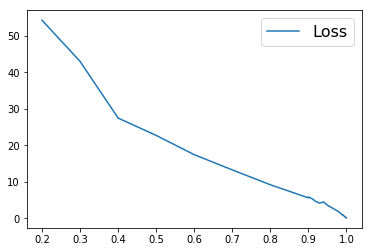

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(gammas[2:], -np.log(scores[2:]), label='Loss')
plt.legend(fontsize=16)

In [19]:
env = gym.make("FrozenLake8x8-v0")
optimal_policy = policy_iteration(env, gamma=gamma)
policy_score = evaluate_policy(env, optimal_policy, gamma, n=100)
print(optimal_policy)
print(policy_score)
for i in range(8):
    print(action_to_i_rev[optimal_policy[8 * i + 0]], action_to_i_rev[optimal_policy[8 * i + 1]],
          action_to_i_rev[optimal_policy[8 * i + 2]], action_to_i_rev[optimal_policy[8 * i + 3]],
          action_to_i_rev[optimal_policy[8 * i + 4]], action_to_i_rev[optimal_policy[8 * i + 5]],
          action_to_i_rev[optimal_policy[8 * i + 6]], action_to_i_rev[optimal_policy[8 * i + 7]])

[3 2 2 2 2 2 2 2 3 3 3 3 3 3 3 2 0 0 0 0 2 3 3 2 0 0 0 1 0 0 2 2 0 3 0 0 2
 1 3 2 0 0 0 1 3 0 0 2 0 0 1 0 0 0 0 2 0 1 0 0 1 2 1 0]
0.89
u r r r r r r r
u u u u u u u r
l l l l r u u r
l l l d l l r r
l u l l r d u r
l l l d u l l r
l l d l l l l r
l d l l d r d l
